<a href="https://colab.research.google.com/github/shauryashivam/Pattern-Recognition-Assignment/blob/main/Assignment_2_Question_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.svm import SVC 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from collections import Counter
from sklearn.neighbors import KNeighborsClassifier
from sklearn.manifold import TSNE

In [ ]:
def euclidean_distance(x1, x2):
        return np.sqrt(np.sum((x1 - x2)**2))


class KNN:

    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        k_idx = np.argsort(distances)[:self.k]
        k_neighbor_labels = [self.y_train[i] for i in k_idx]  
        most_common = Counter(k_neighbor_labels).most_common(1)
        return most_common[0][0]


In [ ]:
url_train="https://raw.githubusercontent.com/shauryashivam/dataset/main/sat.trn"
url_test="https://raw.githubusercontent.com/shauryashiam/dataset/main/sat.tst"

In [ ]:
train=np.genfromtxt(url_train,delimiter=' ',dtype=int)
test=np.genfromtxt(url_test,delimiter=' ',dtype=int)

test

array([[ 80, 102, 102, ..., 113,  87,   3],
       [ 76, 102, 102, ..., 104,  83,   3],
       [ 80,  98, 106, ...,  96,  75,   4],
       ...,
       [ 56,  68,  91, ...,  92,  74,   5],
       [ 56,  68,  87, ...,  92,  70,   5],
       [ 60,  71,  91, ..., 108,  92,   5]])

In [ ]:
train

array([[ 92, 115, 120, ..., 113,  87,   3],
       [ 84, 102, 106, ..., 104,  79,   3],
       [ 84, 102, 102, ..., 104,  79,   3],
       ...,
       [ 68,  75, 108, ..., 104,  85,   4],
       [ 71,  87, 108, ..., 104,  85,   4],
       [ 71,  91, 100, ..., 100,  81,   4]])

In [ ]:
x_train=train[:, [1, 35]]
y_train=train[:,-1]
x_test= test[:, [1, 35]]
y_test=test[:,-1]
x_train

array([[115,  87],
       [102,  79],
       [102,  79],
       ...,
       [ 75,  85],
       [ 87,  85],
       [ 91,  81]])

In [ ]:
y_train

array([3, 3, 3, ..., 4, 4, 4])

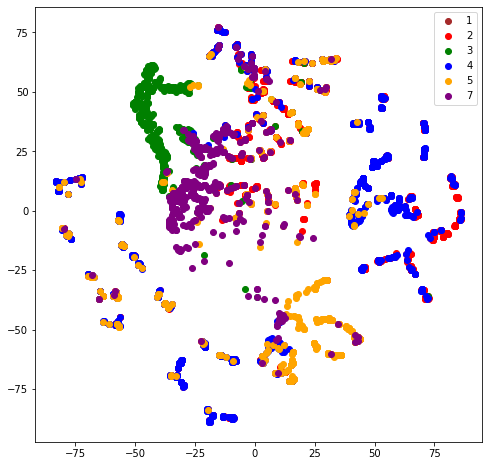

In [ ]:
tsne = TSNE(n_components=2, random_state=0)
X_2d = tsne.fit_transform(x_train)

target_ids = range(len(np.unique(y_train)))
plt.figure(figsize=(8,8))
colors = 'brown','red', 'green', 'blue', 'orange', 'purple'
for i, c, label in zip(target_ids, colors,np.unique(y_train)):
    plt.scatter(X_2d[y_train == i, 0], X_2d[y_train == i, 1], c=c, label=label)

plt.legend()
plt.show()

In [ ]:
Krange=list(range(1,35))
param_grid = dict(n_neighbors=Krange) 
   
grid = GridSearchCV(KNeighborsClassifier(),param_grid,scoring='accuracy') 
   
# fitting the model for grid search 
grid.fit(x_train, y_train) 
 

grid_predictions = grid.predict(x_test) 
print(accuracy_score(y_test,grid_predictions))

0.7015


In [ ]:
error= []

# Will take some time
for i in range(1,35):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    i_pred= knn.predict(x_test)
    error.append(np.mean(i_pred != y_test))

Minimum error at K = 28


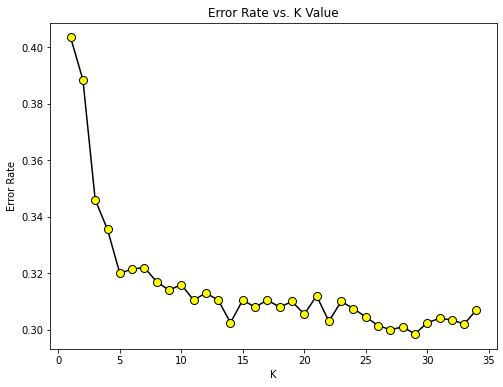

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(range(1,35),error,color='black', marker='o',markerfacecolor='yellow', markersize=8)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error at K =",error.index(min(error)))

In [ ]:
#Implemented from scratch
print('Implemented from scratch')
print('\n')
knn = KNN(k=28)
knn.fit(x_train, y_train)
predictions = knn.predict(x_test)
print(accuracy_score(y_test, predictions))
print('\n')


Implemented from scratch


0.6985




In [ ]:
#Inbuilt Sklearn Function
print('Inbuilt function')
print('\n')
knn = KNeighborsClassifier(n_neighbors=28,metric='euclidean')

knn.fit(x_train,y_train)
pred = knn.predict(x_test)
predictions = knn.predict(x_test)
print(accuracy_score(y_test, predictions))
print('\n')

Inbuilt function


0.699


